In [1]:
import doe
import numpy as np
import matplotlib.pyplot as plt

In this example we will investigate two fractional factorial designs to investigate a model with interactions. The main goal here is to see if, expecting interactions between  some factors, we can get a good model with a limited amount of measurements. Let's consider a model whose ground truth is

$$
y = 1 + 3x_1 - 2x_2 - x_3 + x_4 +2x_1x_4.
$$

As we can see, there is some interaction between $x_1$ and $x_4$. We will now consider two fractional factorial designs. For this example, we will store all the coefficients in `true_coefficients`. Of course, these are not known in practice. But here we will use them to compare the accuracy of our different designs. We also define a function `measure` to simulate real measurements.

In [24]:
def measure(x):
    return 1 + 3*x[0] - 2*x[1] - x[2] + x[3] + 2*x[0]*x[3] + np.random.normal(loc=0, scale=0.5)

true_coefficients = [1, 3, -2, -1, 1, 0, 0, 2, 0, 0, 0]

The first we will consider has a pretty good resolution and is defined by the generator `"123=4"`. In theory, this model should be sufficient since we will only have the following aliases :

* `"I=1234"`, which is not a problem since we do not investigate for any four-term interactions.
* `"123=4"`, which is not a problem since we do not investigate for any three-term interactions.
* `"12=34"`, which is not a problem since we do not expect to have any interaction between $x_1$ and $x_2$, not between $x_3$ and $x_4$.
* `"13=24"`, which is not a problem since we do not expect to have any interaction between $x_1$ and $x_3$, not between $x_2$ and $x_4$.
* `"14=23"`, which is not a problem since we do not expect to have any interaction between $x_2$ and $x_3$. Therefore the interaction between $x_1$ and $x_4$ will be aliased to nothing significant.

Let's define this design, generate responses according to our ground truth, and finally fit the model.

In [123]:
# Defining the design

modelspec = "interaction"
x = doe.fracfact("1 2 3 4")

# Generating responses

y = np.array([measure(x) for x in x])

# Fitting the model

model = doe.fitlm(x=x, y=y, modelspec=modelspec)

In the following part, we analyse the model.

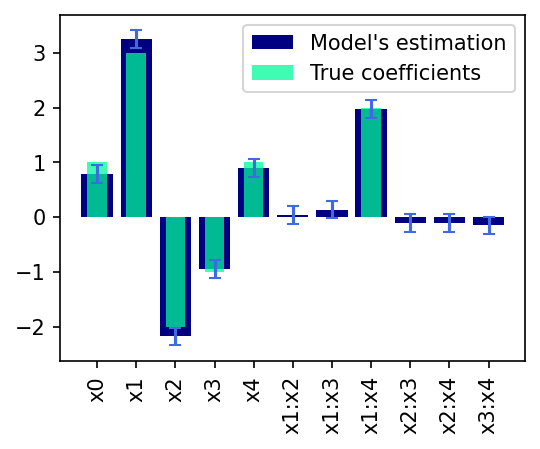

In [124]:
# Getting the model's coefficients

a = model.coefficients
a_names = model.coef_names()

# Computing errorbars

X = doe.x2fx(x=x, modelspec=modelspec)
N = x.shape[0]
P = x.shape[1]
dof = N - P
residues = model.predict(x) - y
try:
    D = np.linalg.inv(X.T @ X)
except:
    D = np.eye(N=X.shape[1]) * (1 / X.shape[1])
confidence = 0.05
confidence_intervals = doe.t(confidence=confidence/2, dof=dof) * np.sqrt(np.diag(D) * (residues.T @ residues) / dof)

# Drawing

plt.figure(figsize=(4, 3), dpi=150)
plt.bar(a_names, a, color="navy", label="Model's estimation")
plt.bar(a_names, true_coefficients, color="mediumspringgreen", label="True coefficients", width=0.5, alpha=0.75)
plt.errorbar(x=a_names, y=a, yerr=confidence_intervals, fmt="none", ecolor="royalblue", capsize=3)
plt.xticks(rotation=90)
plt.legend()
plt.show()